In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

In [41]:
#df=pd.read_csv(r"C:\Users\Kamui\Downloads\Fraud_Detection.csv" , header=None) --> different dtype in same column issue. Needs low_memory=false, panda will read entire file expect of reading data in chunks
df=pd.read_csv(r"C:\Users\Kamui\Downloads\Fraud_Detection.csv")

In [42]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0


In [43]:
df.shape #no of rows and colums

(636262, 10)

In [44]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [45]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [46]:
df["isFraud"].unique() #integer value 0 ra 1 le classify garekoxa, isfraud or not vanera

array([0, 1], dtype=int64)

In [47]:
len(df[df["isFraud"]==1]) #total 821 entries with fraud being true

821

In [48]:
len(df[df["isFraud"]==0])

635441

<function matplotlib.pyplot.show(close=None, block=None)>

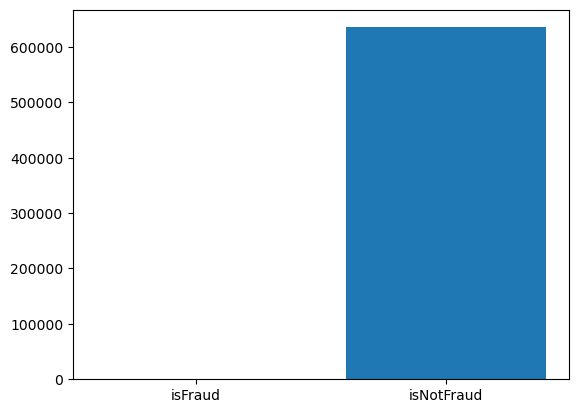

In [ ]:
categories = ["isFraud","isNotFraud"]
values = [len(df[df["isFraud"]==1]),len(df[df["isFraud"]==0])] # values = [821,635441] siddai from above output numbers

plt.bar(categories,values)
plt.show

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636251 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636261 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636252 non-null  float64
 9   isFraud         636262 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 48.5+ MB


In [51]:
df.isnull().sum()

step               0
type              11
amount             0
nameOrig           0
oldbalanceOrg      1
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest    10
isFraud            0
dtype: int64

In [52]:
df.isna().sum()

step               0
type              11
amount             0
nameOrig           0
oldbalanceOrg      1
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest    10
isFraud            0
dtype: int64

In [53]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,636262.000000,6.362620e+05,6.362610e+05,6.362620e+05,6.362620e+05,6.362520e+05,636262.000000
mean,242.931935,1.800585e+05,8.317949e+05,8.528354e+05,1.096212e+06,1.221804e+06,0.001290
std,142.330857,6.069714e+05,2.885638e+06,2.921296e+06,3.375389e+06,3.656236e+06,0.035898
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,155.000000,1.340742e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,238.000000,7.481577e+04,1.423900e+04,0.000000e+00,1.315397e+05,2.147000e+05,0.000000
75%,334.000000,2.084988e+05,1.073000e+05,1.435652e+05,9.384820e+05,1.109230e+06,0.000000
max,742.000000,5.722962e+07,4.368662e+07,4.367380e+07,3.551855e+08,3.555534e+08,1.000000


In [54]:
df["type"].unique()

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', nan],
      dtype=object)

In [55]:
df=df.dropna()

In [56]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [57]:
label_encoder=LabelEncoder()
df["type"]=label_encoder.fit_transform(df["type"])
df['nameOrig']=label_encoder.fit_transform(df['nameOrig'])
df['nameDest']=label_encoder.fit_transform(df['nameOrig'])

In [84]:
df.dtypes

step                int64
type                int32
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [58]:
x = df.drop(['isFraud'], axis=1)
y=df['isFraud']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train.shape

(508992, 9)

In [61]:
x_test.shape

(127248, 9)

In [62]:
y_test.shape

(127248,)

In [63]:
y_train.shape

(508992,)

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [65]:
classifier.fit(x_train,y_train) #studies x and y ko training value and tries to find the map pattern from x to y

DecisionTreeClassifier()

In [75]:
y_pred=classifier.predict(x_test) #x_test value lai output map garxa

In [76]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
y_pred_train=classifier.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
classifier.score(x_test,y_test)

0.9993870237646171

In [85]:
classifier.score(x_train,y_train)

1.0